<h1><center>Nonograms project</center></h1>

<h3><center>Julia Taborek</center></h3>

## 1. Introduction to the problem

Nonograms, also known as Hanjie, Paint by Numbers, Picross, Griddlers, and Pic-a-Pix, and by various other names, are picture logic puzzles in which cells in a grid must be colored or left blank according to numbers at the side of the grid to reveal a hidden pixel art-like picture. In this puzzle type, the numbers are a form of discrete tomography that measures how many unbroken lines of filled-in squares there are in any given row or column. For example, a clue of "4 8 3" would mean there are sets of four, eight, and three filled squares, in that order, with at least one blank square between successive sets.

Nonograms were named after Non Ishida, one of the two inventors of the puzzle.

In my project I will show ways to solve nonograms using genetic algorithms.

## 2. Code

In [1]:
# importing libraries
import numpy as np
import pygad
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from random import randint
import time

## 2.1 First method

Gene is the coordinate of the column where the next row requirement starts. The length of the chromosome is equal to the number of requirements in the rows.

The value of the first gene tells in which column the sequence for the first condition begins. Columns are numbered from 0.

Example 

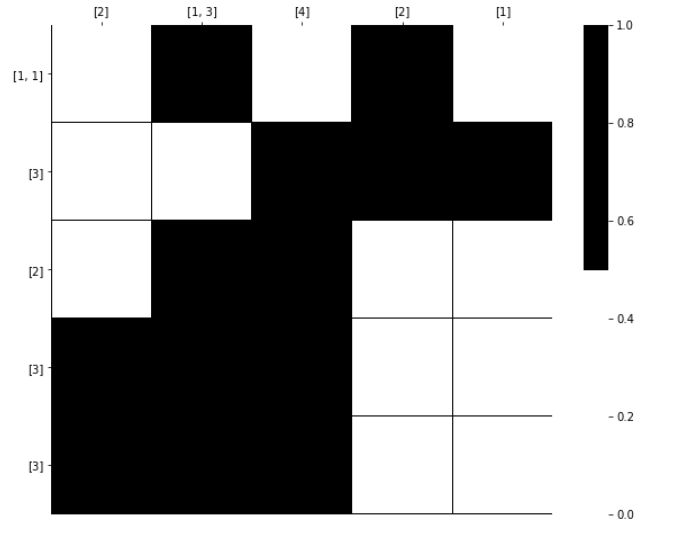

solution: [1., 3., 2., 1., 0., 0.]

First gene tells that first requirement for row (1) starts in 1 column.

Third gene tells that third requirement for row (3) starts in 2 column.

Fourth gene tells that fourth requirement for row (2) starts in 1 column.

### Small inputs

Fitness value of the best solution = 0


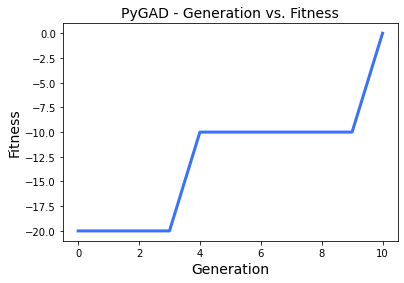

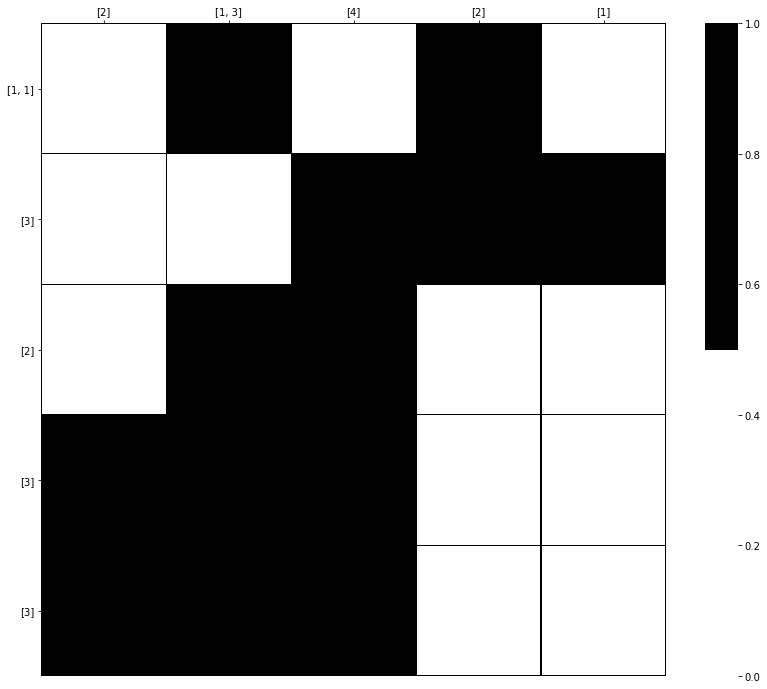

In [2]:
# coding inputs
# req_col - list of lists with requirements for each column
# for example: in first column (column number 0) 2 cells must be colored
req_col = [[2], [1,3], [4], [2], [1]]
# req_rows - same as req_col
req_rows = [[1,1], [3], [2], [3], [3]]

row  = [item for sublist in req_rows for item in sublist]

# genes are number of column in with start current sequence
gene_space = [0,1,2,3,4] 


def nonogram(solution):
    """
    a function that converts the solution into a matrix representing a filled nonogram and punish for incorrectly filled rows
    
    Inputs:
    - solution - given by genetic algorithm solution
    
    Returns:
    - completed nonogram as matrix
    - penalty 
    """
    # nono is nonogram represented as metrix
    # firstly it is only filled with zeros
    # size of nono is number of column x number of columns, because our nonogram is square
    nono = np.zeros((len(gene_space), len(gene_space)))
    # transformt solution to list
    sol = list(solution.copy())
    # r_c - list with cell length values to color without division into rows
    r_c = [item for sublist in req_rows for item in sublist]
    # set initial penalty to 0
    penalty = 0 
    for j in range(len(req_rows)):
        # n_row - counts how many colored sequences are in the rows
        # initial value for each row is equal to 1
        n_row = 1 
        # k_row - list with values of solution for current row
        # shows in which columns sequences of colored cells begin
        k_row = [] 
        # stays on the current row until the number of colored sequences is less or equal than required
        while n_row <= len(req_rows[j]):
            # k - current position 
            k = sol[0]
            # checks if in a given row another sequence doesn't already start with k
            if k in k_row: 
                penalty += 10
            # adding k to list of values for current row
            k_row.append(k)
            # r - length of the current sequence (number of cells to fill in)
            r = r_c[0]
            # checks if the next sequence is in a later column
            if n_row > 1 and k <= k_row[-2]: 
                penalty += 10
            # penalty if there is no break between sequences
            if k >= 1 and nono[j, int(k)-1] == 1:
                penalty += 10
            # penalty if there is no break between sequences
            if k < len(req_rows)-1 and nono[j, int(k)+1] == 1: 
                penalty += 10
            # changing nono values to 1 depending on k and r value
            for i in range(int(k), int(k)+r):
                if i < len(req_rows):
                    nono[j, i] = 1
                # penalty for going off the board
                else:
                    penalty += 1
            # deleting first element of solution and firs requirement
            # to always be able to refer to 0 elements of the list
            del sol[0]
            del r_c[0]
            # changing n_row value, adding 1, because 1 add one sequence
            n_row += 1
    return nono, penalty




def columns(matrix):
    """
    a function that counts the number of 1 (collored cells) in each column
    
    Inputs:
    - matrix - completed nonogram
    
    Returns:
    - l - list of lists of the length of the sequence of colored cells in each column
    """
    # l - an empty list to which I will add the results for each column
    l = []
    for j in range(len(matrix)):
        # column - list with values for current column
        column = matrix[:, j]
        # l_col - a list containing the length of the consecutive painted cell sequences for the current column
        l_col = []        
        # seq - counts the length of occurrences of 1 in a row in each row
        seq = 0
        for i in range(len(column)):
             # if current element is equal to 1, adds one to the length of the sequence
            if column[i] == 1:
                seq += 1
            else:
                # if element of the list is equal to 0:
                if seq!=0:
                    # if seq is different from 0, adding length of this sequence to list for current column
                    l_col.append(seq)
                    # changing seq value to 0
                    seq = 0
        # if seq is different from 0, adding length of last sequence to list for current column
        if seq != 0:
            l_col.append(seq)
        # adding values for the current row to the main list
        l.append(l_col)
    return l


def fitness_func(solution, solution_idx):
    """
    Fitness function - checks the quality of the solution
    
    Inputs:
    solution, solution_idx
    
    Description:
    penalty function for invalid values of shaded cells in each column
    
    Max value: 0
    """
    nono = nonogram(solution)[0]
    penalty = nonogram(solution)[1]
    for i in range(len(nono)):
        if columns(nono)[i] != req_col[i]:
            penalty += 10
    return -penalty

fitness_function = fitness_func

# population size
sol_per_pop = 200


# how many parents we choose (about 50% of the population)
num_parents_mating = 100
# number of generations
num_generations = 100
# how many parents to keep
keep_parents = 5


# number of genes is equal to number of sequence to color and put in nonogram
num_genes=len(row)

# parent selection
#sss = steady
parent_selection_type = "sss"

# crossover
crossover_type = "two_points"

# mutation set to minimum value
# 1/num_genes
mutation_type = "random"



# initiation of the algorithm with higher parameters stored in attributes
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])

#running the algorithm
ga_instance.run()

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

# visualisation
def visualisation(solution):
    plt.figure(figsize=(14, 12))
    # the black color corresponds to the painted ones, white - blank 
    # row and column captions match the requirements of the nonogram
    ax = sns.heatmap(nonogram(solution)[0], cmap = ['white', 'black'], linewidths=0.1, linecolor = 'black',xticklabels=req_col, yticklabels=req_rows)
    plt.yticks(rotation=0)
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    return ax

visualisation(solution)

#### Other examples for 5x5 nonograms:

#### 2) Smile

Fitness value of the best solution = 0


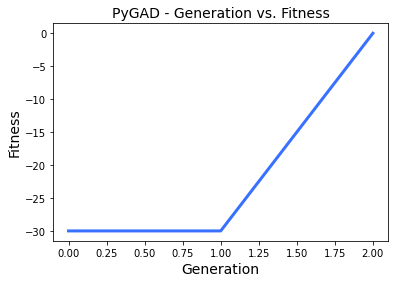

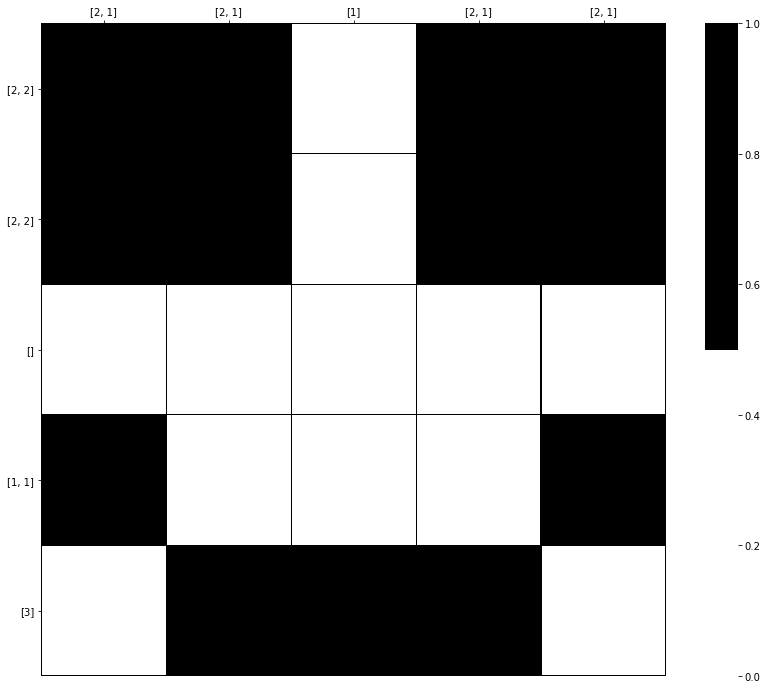

In [4]:
req_col = [[2,1], [2,1], [1], [2,1], [2,1]]
req_rows = [[2,2], [2,2], [], [1,1], [3]]

row = [item for sublist in req_rows for item in sublist]


ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])
ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

#### 3)

Fitness value of the best solution = 0


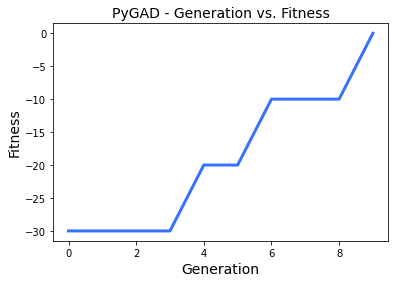

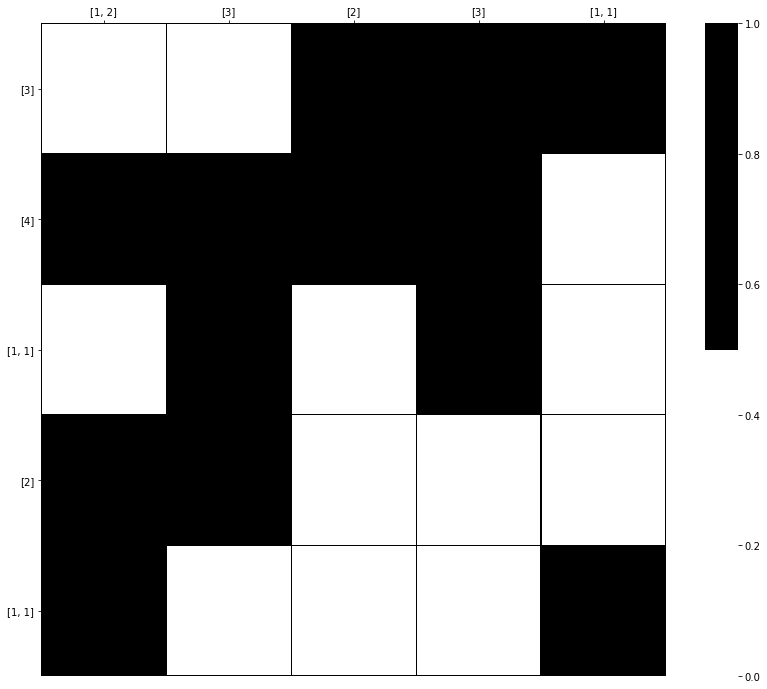

In [5]:
req_col = [[1,2], [3], [2], [3], [1,1]]
req_rows = [[3], [4], [1,1], [2], [1,1]]

row = [item for sublist in req_rows for item in sublist]

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

#### 4)

Fitness value of the best solution = 0


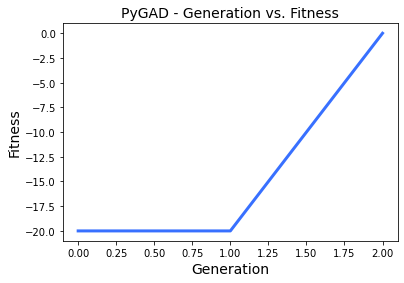

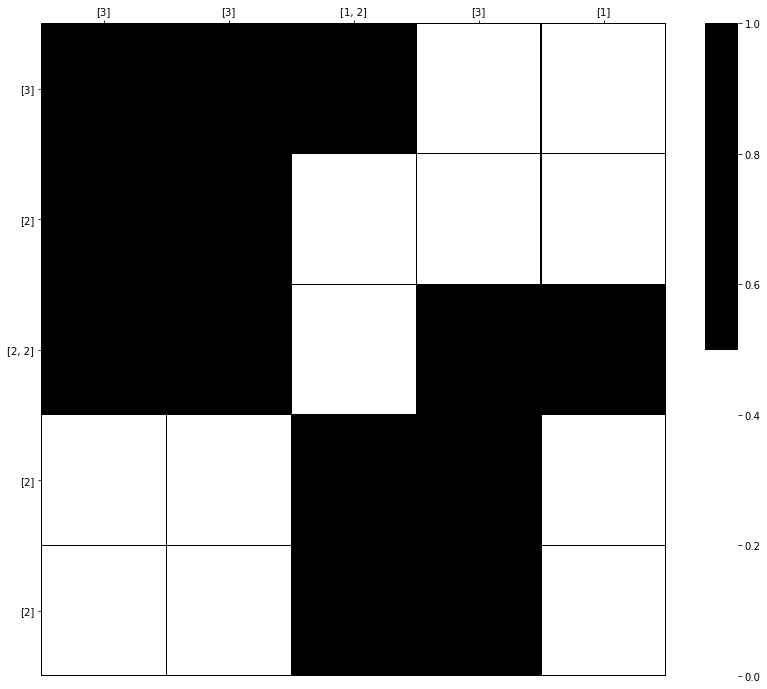

In [6]:
req_col = [[3], [3], [1,2], [3], [1]]
req_rows = [[3], [2], [2,2], [2], [2]]

row = [item for sublist in req_rows for item in sublist]

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

#### 5) Plus

Fitness value of the best solution = 0


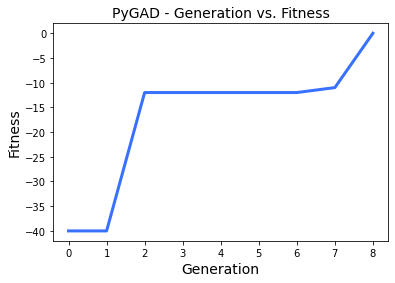

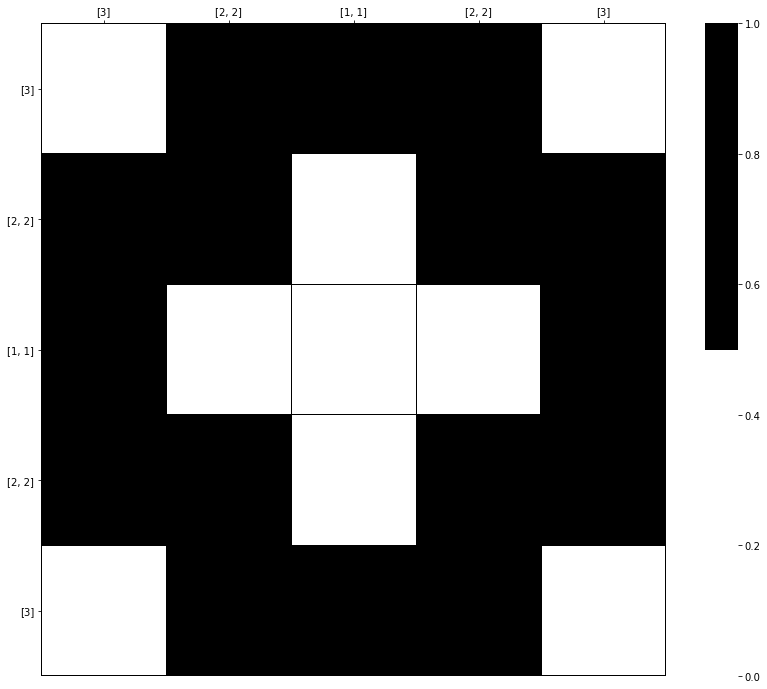

In [7]:
req_col = [[3], [2,2], [1,1], [2,2], [3]]
req_rows = [[3], [2,2], [1,1], [2,2], [3]]

row = [item for sublist in req_rows for item in sublist]


ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

### Test for small inputs

Fitness value of the best solution = 0


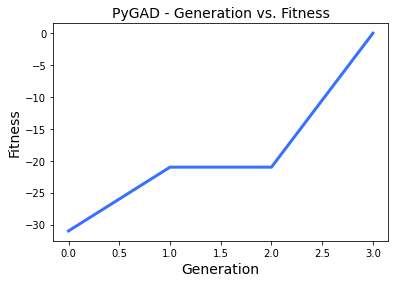

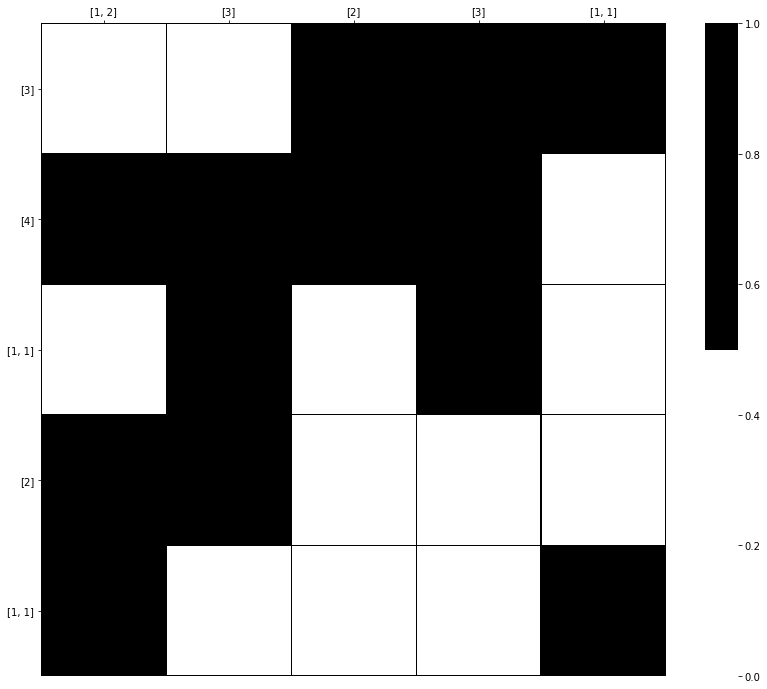

In [8]:
req_col1 = [[2], [1,3], [4], [2], [1]]
req_rows1 = [[1,1], [3], [2], [3], [3]]

req_col2 = [[3], [3], [1,2], [3], [1]]
req_rows2 = [[3], [2], [2,2], [2], [2]]

req_col3 = [[1,2], [3], [2], [3], [1,1]]
req_rows3 = [[3], [4], [1,1], [2], [1,1]]

req_col4 = [[2,1], [2,1], [1], [2,1], [2,1]]
req_rows4 = [[2,2], [2,2], [], [1,1], [3]]

req_col5 = [[3], [2,2], [1,1], [2,2], [3]]
req_rows5 = [[3], [2,2], [1,1], [2,2], [3]]

cols = [req_col1, req_col2, req_col3, req_col4, req_col5]
rows = [req_rows1, req_rows2, req_rows3, req_rows4, req_rows5]

times = []

for j in range(100):
    # randomly selecting one of the inputs
    i = randint(0, 4)
    req_col = cols[i]
    req_rows = rows[i]
    
    row = [item for sublist in req_rows for item in sublist]

    ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])
    
    start = time.time()
    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    end = time.time()
    
    # saving time for perfect attempts
    if solution_fitness == 0:
        times.append(end - start)

# printing the solution and visualisation for the last input
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

In [9]:
print('Perfect solution: ',len(times), '%')
print('Mean time for perfect solution: ', np.mean(times))

small_inputes_accuracy = len(times)
small_mean_time = np.mean(times)

Perfect solution:  100 %
Mean time for perfect solution:  0.38391480207443235


#### Note

The algorithm works perfectly for 5x5 nonograms. The algorithm works very fast, it can find a solution even in the 2nd generation the average execution time is less than 1 second. 

### Checking bigger inputs

The next step was to check how the algorithm copes with larger inputs.

#### 7x7

With a change in the size of the nonogram, it is necessary to change the gene space.

Fitness value of the best solution = 0


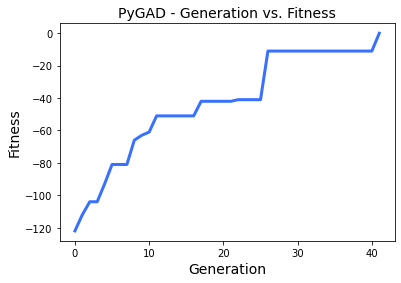

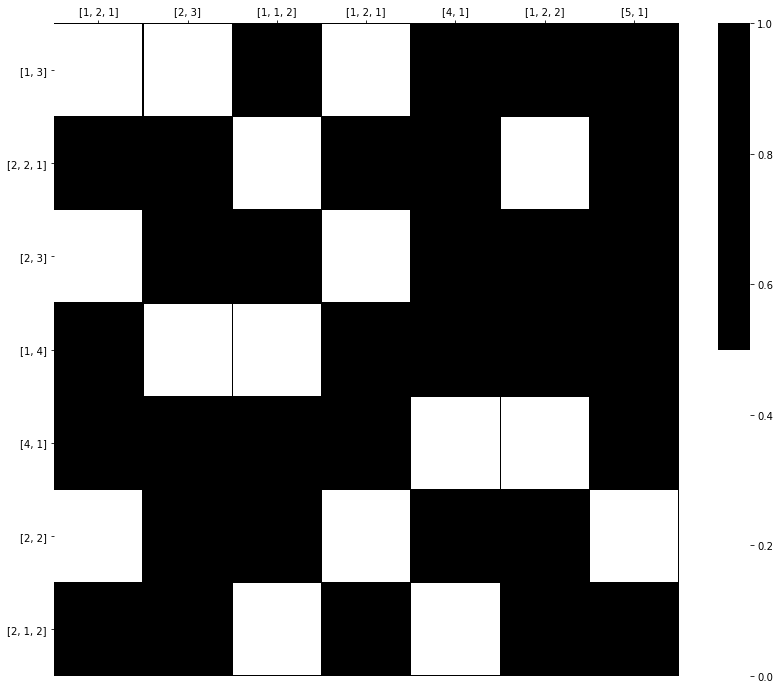

In [10]:
req_col = [[1,2,1], [2,3], [1,1,2], [1,2,1], [4,1], [1,2,2], [5,1]]
req_rows = [[1,3], [2,2,1], [2,3], [1,4], [4, 1], [2,2], [2,1,2]]

row = [item for sublist in req_rows for item in sublist]

# changing gene_space
gene_space = [0,1,2,3,4,5,6] 


fitness_function = fitness_func



ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])

#running the algorithm
ga_instance.run()

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

#### Face

Fitness value of the best solution = 0


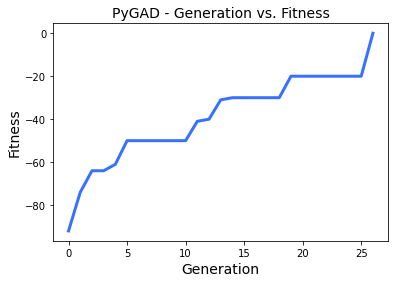

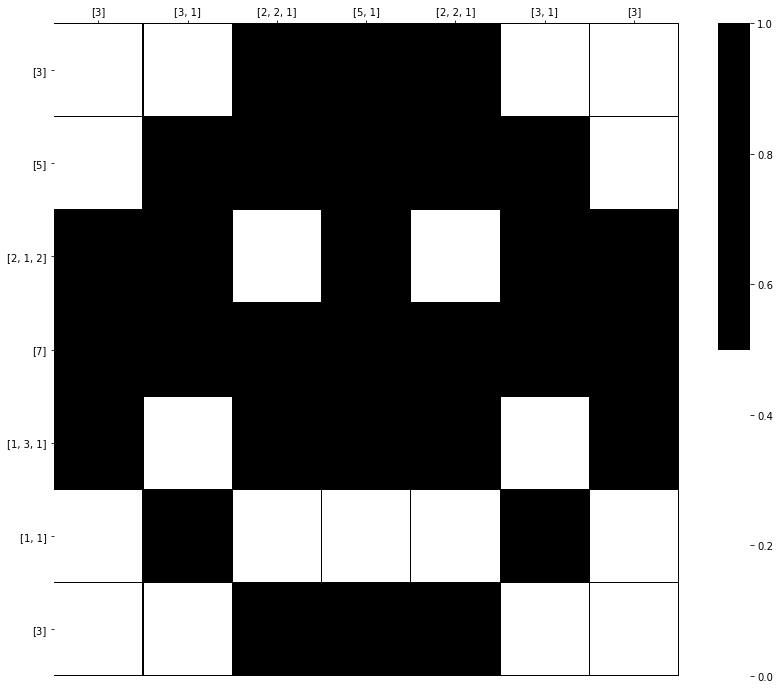

In [11]:
req_col = [[3], [3,1], [2,2,1], [5,1], [2,2,1], [3,1], [3]]
req_rows = [[3], [5], [2,1,2], [7], [1,3,1], [1,1], [3]]

row = [item for sublist in req_rows for item in sublist]

# changing gene_space
gene_space = [0,1,2,3,4,5,6] 


fitness_function = fitness_func



ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])

#running the algorithm
ga_instance.run()

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

#### 8x8

Fitness value of the best solution = 0


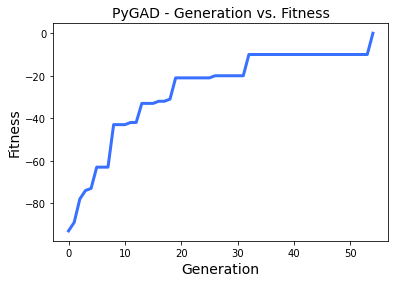

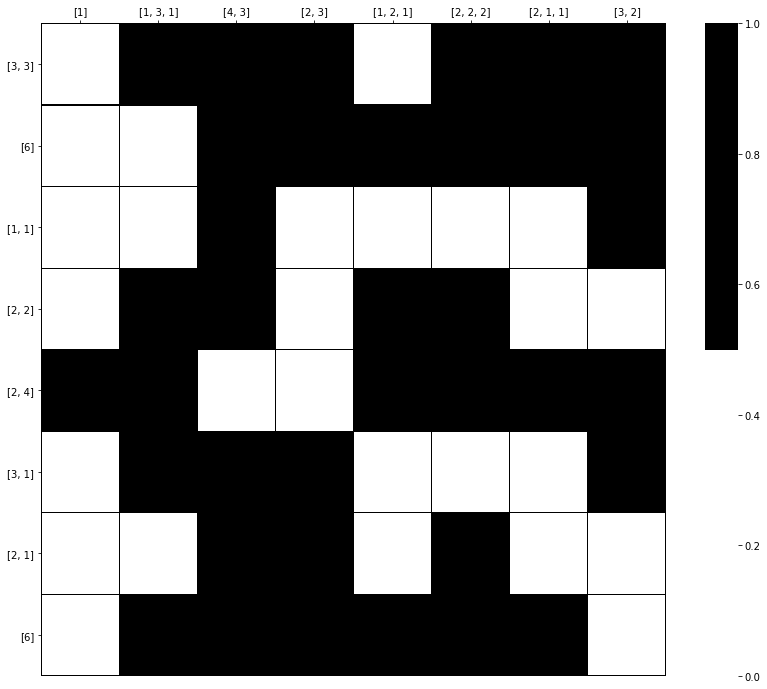

In [12]:
req_col = [[1], [1,3, 1], [4,3], [2,3], [1,2,1], [2,2,2], [2,1,1], [3,2]]
req_rows = [[3,3], [6], [1,1], [2,2], [2,4], [3,1], [2,1], [6]]

row = [item for sublist in req_rows for item in sublist]

gene_space = [0,1,2,3,4,5,6,7] 


fitness_function = fitness_func



ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])

#running the algorithm
ga_instance.run()

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

###### Note

Nonograms to size 8x8 are quickly solved by the algorithm without changing population size and number of generations.

### 10x10 nonograms

#### 1) House

15.575823783874512
Fitness value of the best solution = 0


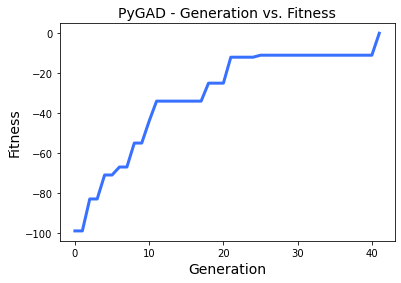

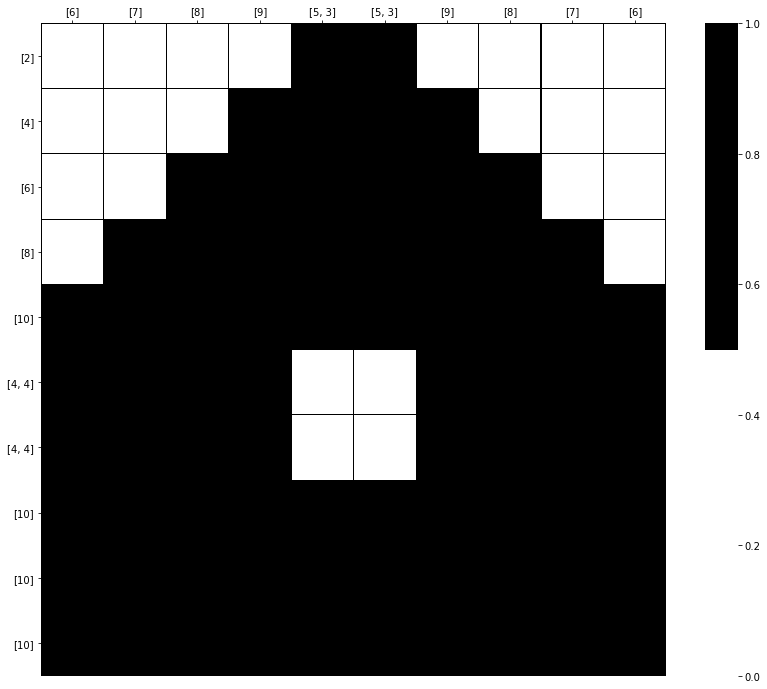

In [14]:
req_col = [[6],[7],[8],[9],[5,3],[5,3],[9],[8],[7],[6]]
req_rows = [[2],[4],[6],[8],[10],[4,4],[4,4],[10],[10],[10]]
row = [item for sublist in req_rows for item in sublist]

# changing gene_space, beacuse know I have 10 columns
gene_space = [0,1,2,3,4,5,6,7,8,9]


# population size
sol_per_pop = 400


# how many parents we choose (about 50% of the population)
num_parents_mating = 200
# number of generations
num_generations = 250

keep_parents = 10

# initiation of the algorithm with higher parameters stored in attributes
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])
start = time.time()
#running the algorithm
ga_instance.run()
end = time.time()
print(end - start)

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

#### Note

I tried modifying the fitness function to penalize for the wrong number of colored cells in each column, but it made the time worse.

Modified function:

def fitness_func(solution, solution_idx):

    """
    Fitness function - checks the quality of the solution
    
    Inputs:
    solution, solution_idx
    
    Description:
    penalty function for invalid values of shaded cells in each row and column
    
    Max value: 0
    """
    nono = nonogram(solution)[0]
    penalty = nonogram(solution)[1]
    if len(nono) < 10:
        for i in range(len(nono)):
            if columns(nono)[i] != req_col[i]:
                 penalty += 10
    else:
        for i in range(len(nono)):
            if columns(nono)[i] != req_col[i]:
                    penalty += 10
            if np.sum(columns(nono)[i]) != np.sum(req_col[i]):
                penalty += 10
    return -penalty
    
Time for house example exceed 2 minutes.

#### 2) Musical note

45.1681022644043
Fitness value of the best solution = 0


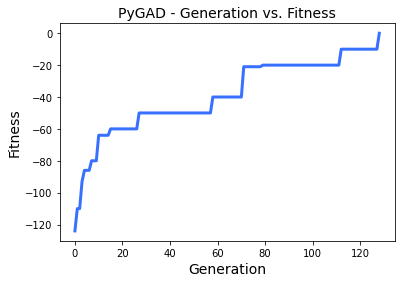

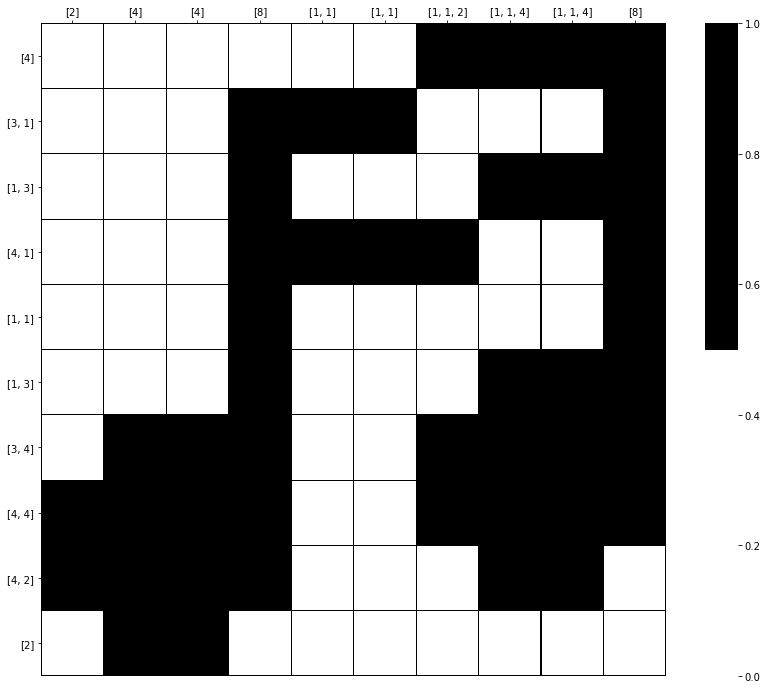

In [15]:
req_col = [[2],[4],[4],[8],[1,1],[1,1],[1,1,2],[1,1,4],[1,1,4],[8]]
req_rows = [[4],[3,1],[1,3],[4,1],[1,1],[1,3],[3,4],[4,4],[4,2],[2]]
row = [item for sublist in req_rows for item in sublist]


gene_space = [0,1,2,3,4,5,6,7,8,9]


# initiation of the algorithm with higher parameters stored in attributes
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])

start = time.time()
#running the algorithm
ga_instance.run()
end = time.time()
print(end - start)

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

#### 3) Alarm clock

26.57246232032776
Fitness value of the best solution = 0


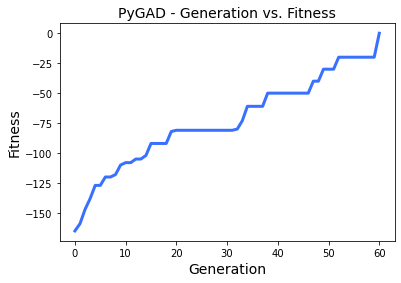

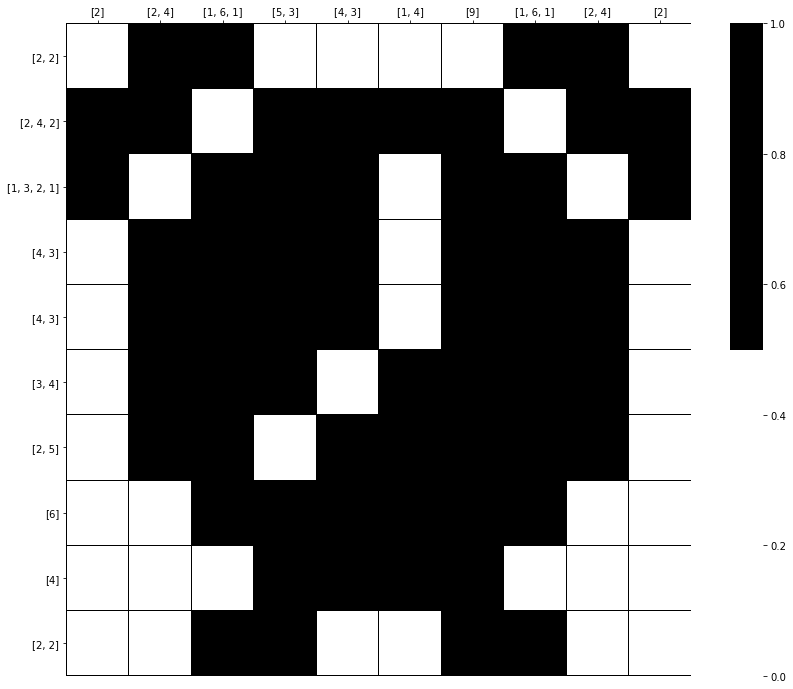

In [19]:
req_col = [[2], [2, 4], [1,6,1], [5,3], [4,3], [1,4], [9], [1,6,1], [2,4], [2]]
req_rows = [[2,2], [2,4,2], [1,3,2,1], [4,3], [4,3], [3,4], [2,5], [6], [4], [2,2]]

row = [item for sublist in req_rows for item in sublist]

# initiation of the algorithm with higher parameters stored in attributes
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])

start = time.time()
#running the algorithm
ga_instance.run()
end = time.time()
print(end - start)

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

### Test for medium inputs

Fitness value of the best solution = 0


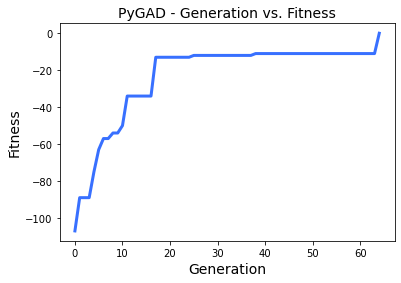

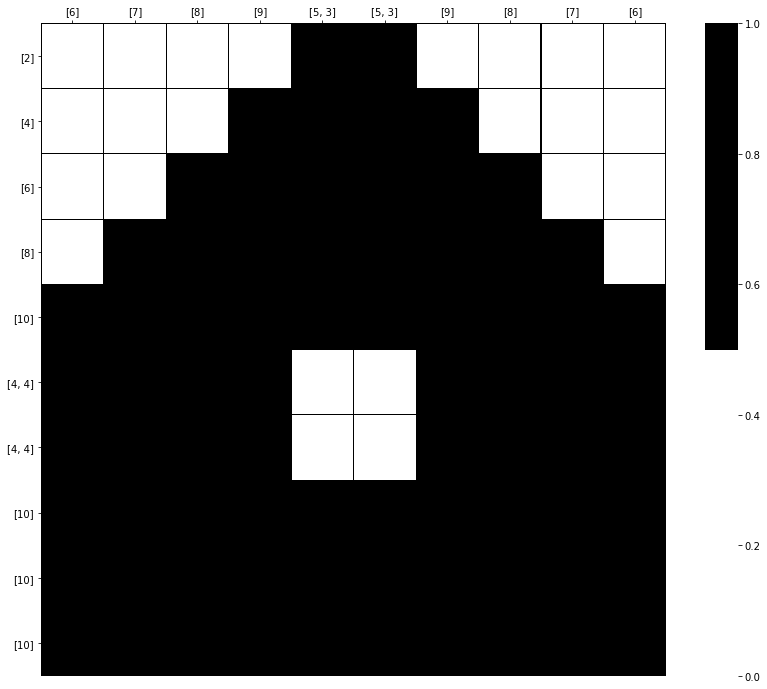

In [25]:
req_col1 = [[6],[7],[8],[9],[5,3],[5,3],[9],[8],[7],[6]]
req_rows1 = [[2],[4],[6],[8],[10],[4,4],[4,4],[10],[10],[10]]

req_col2 = [[2],[4],[4],[8],[1,1],[1,1],[1,1,2],[1,1,4],[1,1,4],[8]]
req_rows2 = [[4],[3,1],[1,3],[4,1],[1,1],[1,3],[3,4],[4,4],[4,2],[2]]

req_col4 = [[2], [2, 4], [1,6,1], [5,3], [4,3], [1,4], [9], [1,6,1], [2,4], [2]]
req_rows4 = [[2,2], [2,4,2], [1,3,2,1], [4,3], [4,3], [3,4], [2,5], [6], [4], [2,2]]

cols = [req_col1, req_col2,  req_col4]
rows = [req_rows1, req_rows2,  req_rows4]

raffled_numbers = []

times = []

# saving which example gets perfect solution
perfect = []

for j in range(10):
    # randomly selecting one of the inputs
    i = randint(0,2)
    raffled_numbers.append(i)
    req_col = cols[i]
    req_rows = rows[i]
    
    row = [item for sublist in req_rows for item in sublist]

    ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])
    
    start = time.time()
    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    end = time.time()
    
    # saving time for perfect attempts
    if solution_fitness == 0:
        times.append(end - start)
        perfect.append(i)

# printing the solution and visualisation for the last input
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

In [26]:
print('Perfect solution: ',len(times) * 10, '%')
print('Mean time for perfect solution: ', np.mean(times))

medium_inputes_accuracy = len(times)
medium_mean_time = np.mean(times)

Perfect solution:  90 %
Mean time for perfect solution:  63.5061043103536


Printing list to see which example didnt get the best solution.

In [29]:
print(raffled_numbers)

print(perfect)

[1, 1, 1, 2, 2, 0, 0, 1, 1, 0]
[1, 1, 1, 2, 2, 0, 0, 1, 0]


#### Note

For a long time of operation of the algorithm, I tested it only for 10 randomly selected examples. Despite the long running time, the algorithm has good performance.

### Large inputs - 15x15

#### 1) Sun

503.6780152320862
Fitness value of the best solution = 0


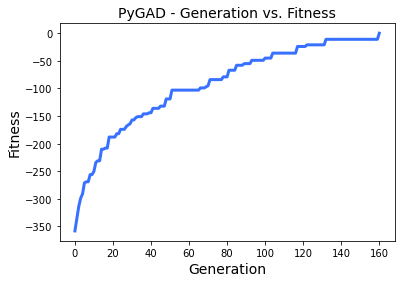

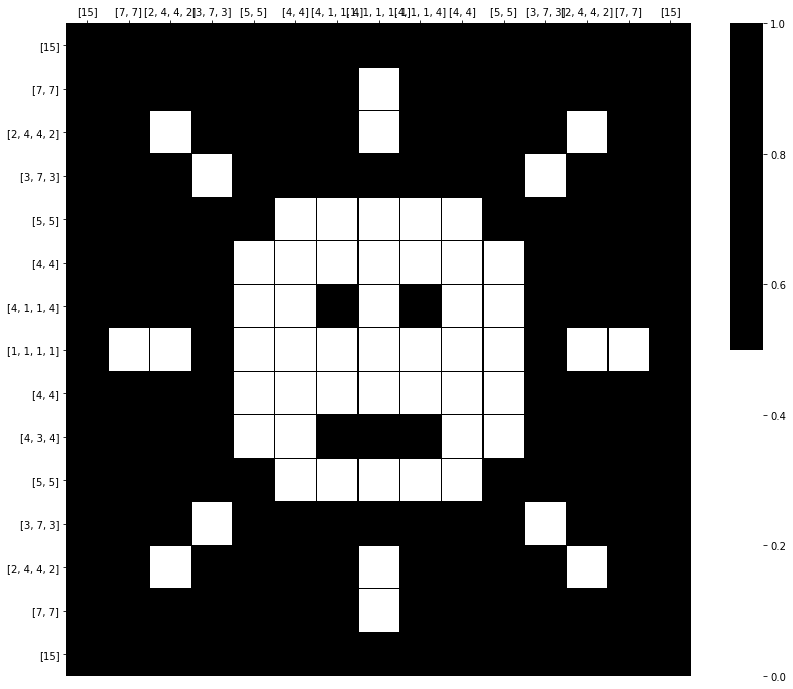

In [31]:
req_col = [[15],[7,7],[2,4,4,2],[3,7,3],[5,5],[4,4],[4,1,1,4],[1,1,1,1,1],[4,1,1,4],[4,4],[5,5],[3,7,3],[2,4,4,2],[7,7],[15]]
req_rows = [[15],[7,7],[2,4,4,2],[3,7,3],[5,5],[4,4],[4,1,1,4],[1,1,1,1],[4,4],[4,3,4],[5,5],[3,7,3],[2,4,4,2],[7,7],[15]]

row = [item for sublist in req_rows for item in sublist]


gene_space = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

# population size
sol_per_pop = 1000


# how many parents we choose (about 50% of the population)
num_parents_mating = 500
# number of generations
num_generations = 350

keep_parents = 25

# initiation of the algorithm with higher parameters stored in attributes
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])
start = time.time()
#running the algorithm
ga_instance.run()
end = time.time()
print(end - start)

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

#### 2) Castle

1585.7438378334045
Fitness value of the best solution = -82


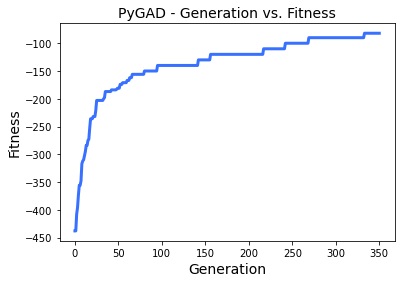

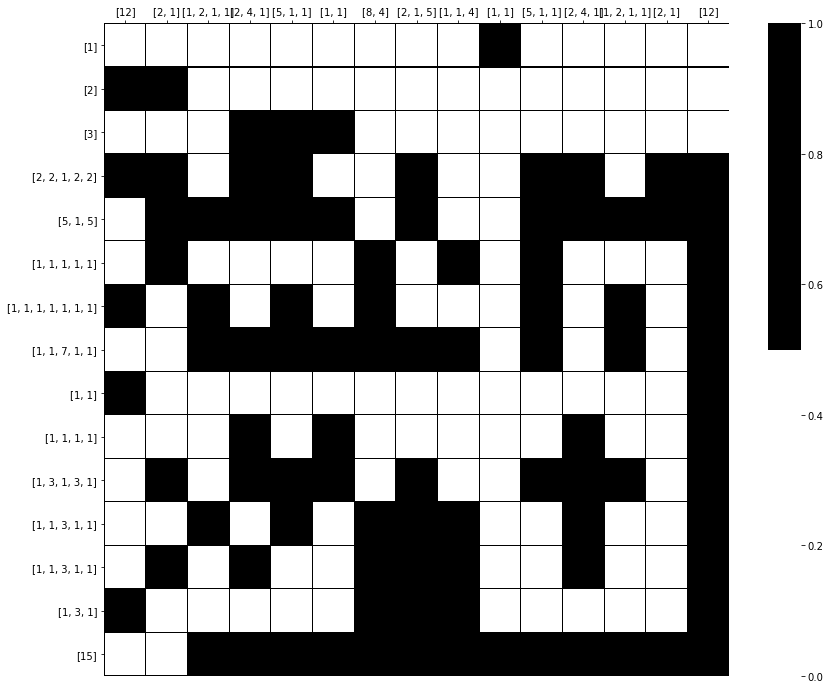

In [35]:
req_col = [[12],[2,1],[1,2,1,1],[2,4,1],[5,1,1],[1,1],[8,4],[2,1,5],[1,1,4],[1,1],[5,1,1],[2,4,1],[1,2,1,1],[2,1],[12]]
req_rows = [[1],[2],[3],[2,2,1,2,2],[5,1,5],[1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,7,1,1],[1,1],[1,1,1,1],[1,3,1,3,1],[1,1,3,1,1],[1,1,3,1,1],[1,3,1],[15]]

row = [item for sublist in req_rows for item in sublist]


gene_space = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

# population size
sol_per_pop = 1000


# how many parents we choose (about 50% of the population)
num_parents_mating = 500
# number of generations
num_generations = 350

keep_parents = 25

# initiation of the algorithm with higher parameters stored in attributes
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])
start = time.time()
#running the algorithm
ga_instance.run()
end = time.time()
print(end - start)

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

#### Note
The algorithm did not find a solution and the execution time was too long.

#### 3) Flowers

In [ ]:
req_col = [[15],[1,1,11],[1,10],[2,8,2],[5,1,1],[1,1,3],[4],[7],[6,2],[5,1,1,1],[2,1,5,2,1],[1,1,5,2],[3,11],[1,1,9],[2,1,10]]
req_rows = [[2,1,10],[1,1,5,1,1],[3,6,1],[1,1,6,2],[2,1,1,3,1],[6,2,1,1,1],[6,1,6],[5,5],[5,1,5],[5,1,5],[4,1,4],[3,1,3],[3,1,3],[4,1,4],[5,5]]

row = [item for sublist in req_rows for item in sublist]


gene_space = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

# population size
sol_per_pop = 1000


# how many parents we choose (about 50% of the population)
num_parents_mating = 500
# number of generations
num_generations = 350

keep_parents = 25

# initiation of the algorithm with higher parameters stored in attributes
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(row),
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])
start = time.time()
#running the algorithm
ga_instance.run()
end = time.time()
print(end - start)

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

#### Note

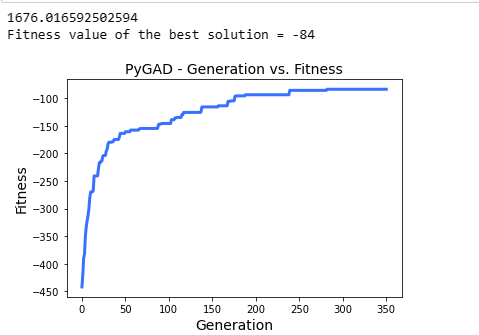


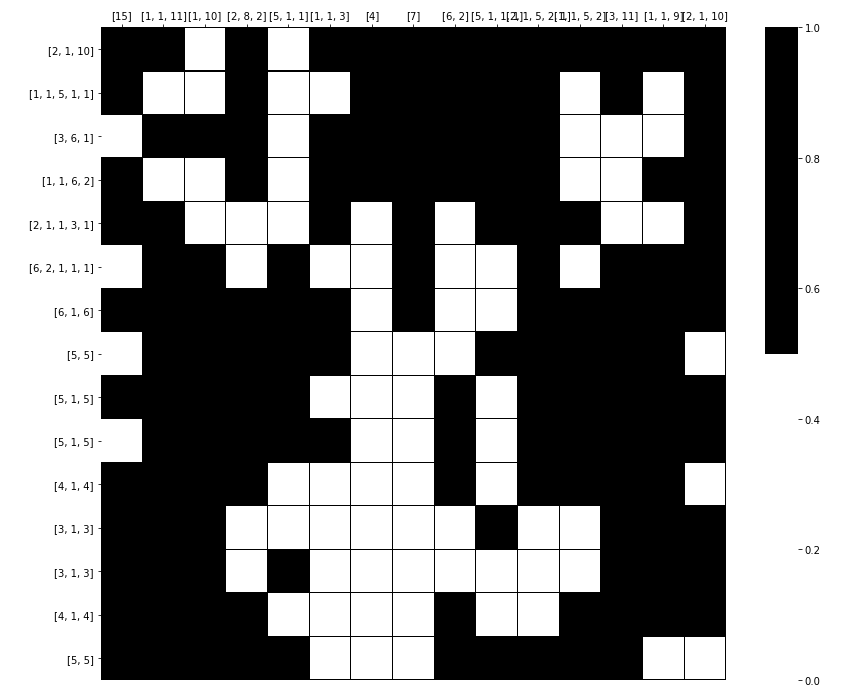

The algorithm does not find a solution.

## 2.2 Second method

The chromosome is the whole field of the nonogram. Genes are 0, 1 depending on whether the place is painted over

### Small inputs

Fitness value of the best solution = 0


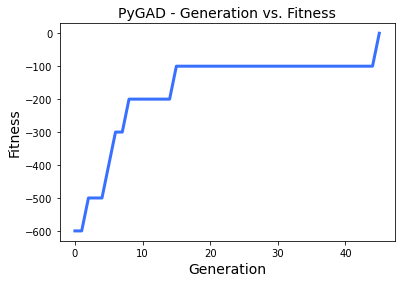

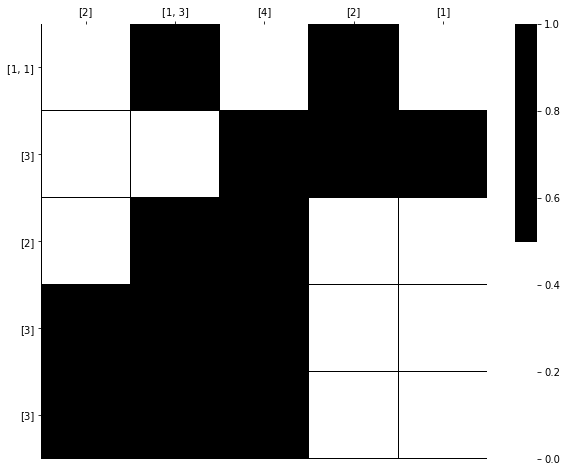

In [30]:
# coding inputs
# req_col - list of lists with requirements for each column
# for example: in first column 2 cells must be colored
req_col = [[2], [1,3], [4], [2], [1]]
# req_rows - same as req_col
req_rows = [[1,1], [3], [2], [3], [3]]

# genes are numbers: 0 - unpainted cell, 1 - colored cell
gene_space = [0,1] 


def nonogram(solution):
    """
    a function that converts the solution into a matrix representing a filled nonogram
    
    Inputs:
    - solution - given by genetic algorithm solution
    
    Returns:
    - completed nonogram as matrix
    """
    # changing the shape of the solution to a matrix with dimensions req_rows x req_col
    nonogram = solution.reshape((len(req_rows), len(req_col)))
    return nonogram


def rows(matrix):
    """
    a function that counts the number of 1 (collored cells) in each row
    
    Inputs:
    - matrix - completed nonogram
    
    Returns:
    - l - list of lists of the length of the sequence of colored cells in each row
    """
    # l - an empty list to which I will add the results for each row
    l = []
    for j in range(len(matrix)):
        # row - list with values for current row
        row = matrix[j]
        # l_row - a list containing the length of the consecutive painted cell sequences for the current row
        l_row = []
        # seq - counts the length of occurrences of 1 in a row in each row
        seq = 0
        for i in range(len(row)):
            # if current element is equal to 1, adds one to the length of the sequence
            if row[i] == 1:
                seq += 1
            else:
                # if element of the list is equal to 0:
                if seq!=0:
                    # if seq is different from 0, adding length of this sequence to list for current row
                    l_row.append(seq)
                    # changing seq value to 0
                    seq = 0
        # # if seq is different from 0, adding length of last sequence to list for current row
        if seq != 0:
            l_row.append(seq)
        # adding values for the current row to the main list
        l.append(l_row)
    return l

def columns(matrix):
    """
    a function that counts the number of 1 (collored cells) in each column
    
    Inputs:
    - matrix - completed nonogram
    
    Returns:
    - l - list of lists of the length of the sequence of colored cells in each column
    """
    # l - an empty list to which I will add the results for each column
    l = []
    for j in range(len(matrix)):
        # column - list with values for current column
        column = matrix[:, j]
        # l_col - a list containing the length of the consecutive painted cell sequences for the current column
        l_col = []        
        # seq - counts the length of occurrences of 1 in a row in each row
        seq = 0
        for i in range(len(column)):
             # if current element is equal to 1, adds one to the length of the sequence
            if column[i] == 1:
                seq += 1
            else:
                # if element of the list is equal to 0:
                if seq!=0:
                    # if seq is different from 0, adding length of this sequence to list for current column
                    l_col.append(seq)
                    # changing seq value to 0
                    seq = 0
        # if seq is different from 0, adding length of last sequence to list for current column
        if seq != 0:
            l_col.append(seq)
        # adding values for the current row to the main list
        l.append(l_col)
    return l


def fitness_func(solution, solution_idx):
    """
    Fitness function - checks the quality of the solution
    
    Inputs:
    solution, solution_idx
    
    Description:
    penalty function for invalid values of shaded cells in each row and column
    
    Max value: 0
    Min value: -100 * 2 * len(req_rows)
    """
    # nono is filled nonogram
    nono = solution.reshape((len(req_col), len(req_col)))
    fitness = 0
    # penalty for wrong value of collored cells
    if np.sum(solution == 1) != np.sum(np.sum(columns(nono))):
        fitness += 1000
    for i in range(len(nono)):
        # checking if the requirements for each row and column are met
        if rows(nono)[i] != req_rows[i]:
            fitness += 100
        if columns(nono)[i] != req_col[i]:
            fitness += 100
    return -fitness

fitness_function = fitness_func

# population size
sol_per_pop = 100

# how many genes in a chromosome -the number of rows of the matrix squared, beacuse the dimension of the matrix is n x n
num_genes = len(req_rows) ** 2

# how many parents we choose (about 50% of the population)
num_parents_mating = 50
# number of generations
num_generations = 100
# how many parents to keep
keep_parents = 5

# parent selection
#sss = steady
parent_selection_type = "sss"

# crossover
crossover_type = "single_point"

# mutation set to minimum value
# 1/num_genes
mutation_type = "random"
# I set the percentage corresponding to one gene
mutation_percent_genes = math.ceil(1/num_genes*100)


# initiation of the algorithm with higher parameters stored in attributes
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(req_rows) ** 2,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=math.ceil(1/num_genes*100),
                      stop_criteria=['reach_0'])

#running the algorithm
ga_instance.run()

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

# visualisation
def visualisation(solution):
    plt.figure(figsize=(10, 8))
    # the black color corresponds to the painted ones, white - blank 
    # row and column captions match the requirements of the nonogram
    ax = sns.heatmap(nonogram(solution), cmap = ['white', 'black'], linewidths=0.1, linecolor = 'black',xticklabels=req_col, yticklabels=req_rows)
    plt.yticks(rotation=0)
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    return ax

visualisation(solution)

### Test for small inputs

Fitness value of the best solution = 0


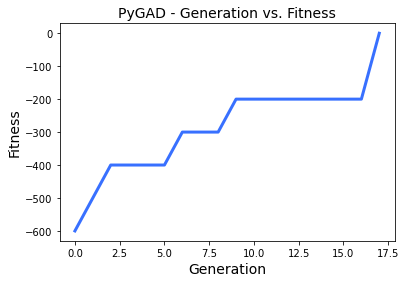

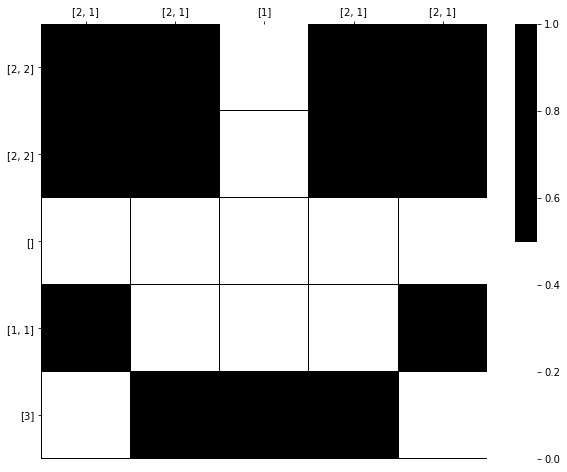

In [31]:
req_col1 = [[2], [1,3], [4], [2], [1]]
req_rows1 = [[1,1], [3], [2], [3], [3]]

req_col2 = [[3], [3], [1,2], [3], [1]]
req_rows2 = [[3], [2], [2,2], [2], [2]]

req_col3 = [[1,2], [3], [2], [3], [1,1]]
req_rows3 = [[3], [4], [1,1], [2], [1,1]]

req_col4 = [[2,1], [2,1], [1], [2,1], [2,1]]
req_rows4 = [[2,2], [2,2], [], [1,1], [3]]

req_col5 = [[3], [2,2], [1,1], [2,2], [3]]
req_rows5 = [[3], [2,2], [1,1], [2,2], [3]]

list_cols = [req_col1, req_col2, req_col3, req_col4, req_col5]
list_rows = [req_rows1, req_rows2, req_rows3, req_rows4, req_rows5]

times = []

for j in range(100):
    # randomly selecting one of the inputs
    i = randint(0, 4)
    req_col = list_cols[i]
    req_rows = list_rows[i]
    
    row = [item for sublist in req_rows for item in sublist]

    ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(req_rows) ** 2,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])
    
    start = time.time()
    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    end = time.time()
    
    # saving time for perfect attempts
    if solution_fitness == 0:
        times.append(end - start)

# printing the solution and visualisation for the last input
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

In [32]:
print('Perfect solution: ',len(times), '%')
print('Mean time for perfect solution: ', np.mean(times))

small_inputes_accuracy_2 = len(times)
small_mean_time_2 = np.mean(times)

Perfect solution:  86 %
Mean time for perfect solution:  0.5239754194437072


#### Note
The percentage of obtaining a perfect solution is lower than in the case of method 1. After firing the above loop with changed parameters: 

sol_per_pop = 200

num_parents_mating = 100

The percentage of perfect solutions increased, however, this resulted in an average time of 1.77 (over a second longer on average per 1 solution)

### Medium inputs

81.74845504760742
Fitness value of the best solution = 0


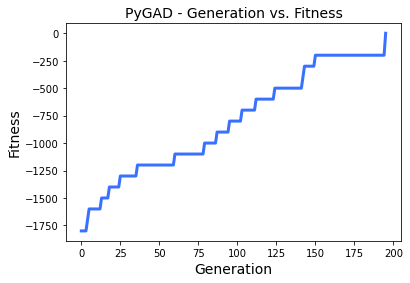

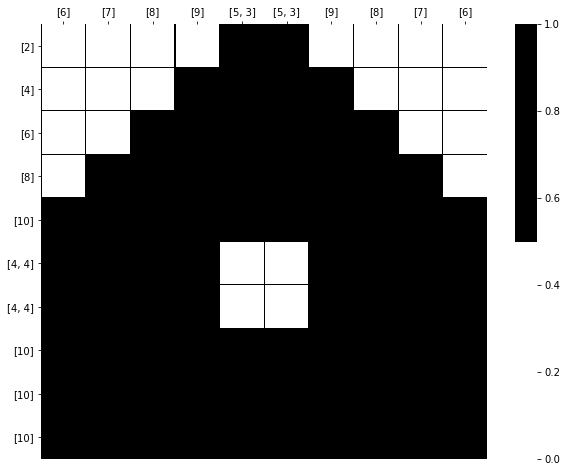

In [42]:
req_col = [[6],[7],[8],[9],[5,3],[5,3],[9],[8],[7],[6]]
req_rows = [[2],[4],[6],[8],[10],[4,4],[4,4],[10],[10],[10]]

# changing gene_space, beacuse know I have 10 columns
gene_space = [0,1]

# population size
sol_per_pop = 200

# how many genes in a chromosome -the number of rows of the matrix squared, beacuse the dimension of the matrix is n x n
num_genes = len(req_rows) ** 2

# how many parents we choose (about 50% of the population)
num_parents_mating = 100
# number of generations
num_generations = 250
# how many parents to keep
keep_parents = 5

# initiation of the algorithm with higher parameters stored in attributes
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(req_rows) ** 2,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])
start = time.time()
#running the algorithm
ga_instance.run()
end = time.time()
print(end - start)

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

95.20984506607056
Fitness value of the best solution = 0


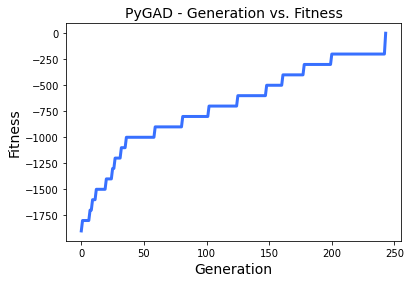

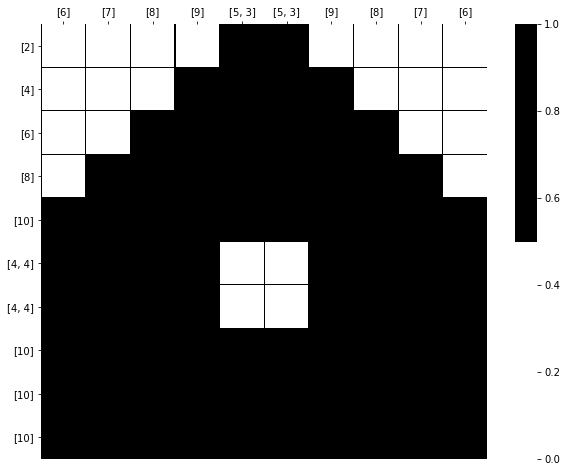

In [41]:
req_col = [[6],[7],[8],[9],[5,3],[5,3],[9],[8],[7],[6]]
req_rows = [[2],[4],[6],[8],[10],[4,4],[4,4],[10],[10],[10]]

# changing gene_space, beacuse know I have 10 columns
gene_space = [0,1]

# population size
sol_per_pop = 220

# how many genes in a chromosome -the number of rows of the matrix squared, beacuse the dimension of the matrix is n x n
num_genes = len(req_rows) ** 2

# how many parents we choose (about 50% of the population)
num_parents_mating = 110
# number of generations
num_generations = 250
# how many parents to keep
keep_parents = 5

# initiation of the algorithm with higher parameters stored in attributes
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=len(req_rows) ** 2,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=1,
                      stop_criteria=['reach_0'])
start = time.time()
#running the algorithm
ga_instance.run()
end = time.time()
print(end - start)

#summary: best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()

visualisation(solution)

The algorithm works for 10x10 nonograms but is much slower than for 5x5 nonograms

Due to the long execution time of the algorithm, I did not test for average inputs.

# 3. Summary

## 3.1

The first method works perfectly for 5x5 nonograms and the execution time of the algorithm is very short. At 10x10 nonograms, the performance drops, but is still very good, but the execution time increases significantly.

Text(0, 0.5, 'Percent [%]')

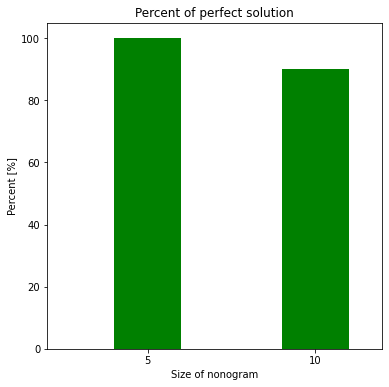

In [37]:
plt.figure(figsize=(6,6))
plt.bar([5,10], [small_inputes_accuracy,medium_inputes_accuracy*10], width=2, color = 'green')
plt.xticks([5,10])
plt.xlim(2,12,)
plt.title('Percent of perfect solution')
plt.xlabel('Size of nonogram')
plt.ylabel('Percent [%]')

Text(0, 0.5, 'Time [s]')

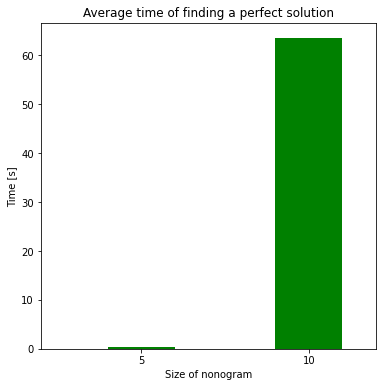

In [41]:
plt.figure(figsize=(6,6))
plt.bar([5,10], [small_mean_time,medium_mean_time], width=2, color = 'green')
plt.xticks([5,10])
plt.xlim(2,12,)
plt.title('Average time of finding a perfect solution')
plt.xlabel('Size of nonogram')
plt.ylabel('Time [s]')

In the case of 15x15 nonograms, the efficiency drops sharply and the execution time of the algorithm is much longer than human completion of the nonogram.

Conclusion: the algorithm can be used to solve many 5x5 nonograms or a small number of examples of 10x10 nonograms.

## 3.2

The second algorithm performs worse than 1 for 5x5 nonograms with maintaining a similar execution time. But its performance is still satisfactory.

For 10x10 nonograms, the execution time of a single example is much longer than the execution time of a single example with 1 algorithm and the average time of 10 examples. I can assume that with a larger sample it would perform worse than 1 algorithm.

Waiting time for 15x15 nonogram execution was too long.

# 4. Bibliography

https://en.wikipedia.org/wiki/Nonogram - rules

https://www.puzzle-nonograms.com/ - inputs

https://www.puzzles-mobile.com/nonograms/random/10x10 - inputs

https://nonograms-katana.fandom.com/wiki/Black-and-White_Nonograms_(1) - inputs